# HyperMapper Demo

You are looking for a parameter setting that minimizes some performance metric of your algorithm (such as runtime, error, or cost). To use HyperMapper for this purpose you need to tell it about your parameters and how to evaluate your algorithm's performance. Here, we will show how to do this on a running example using a simple algorithm called the Branin function. We look for minimizing the value of this function given the two parameters x1 and x2.

https://www.sfu.ca/~ssurjano/branin.html

### The Branin Black-box Function

Consider the Branin black-box function evaluation (which depends on the input variables x1 and x2), this is the objective we want to minimize:

In [1]:
import math
def branin_function(X):
    x1 = X['x1']
    x2 = X['x2']
    a = 1.0
    b = 5.1 / (4.0 * math.pi * math.pi)
    c = 5.0 / math.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * math.pi)
    y_value = a * (x2 - b * x1 * x1 + c * x1 - r) ** 2 + s * (1 - t) * math.cos(x1) + s
    return y_value

### Setup HyperMapper to Run on Branin

The inputs to HyperMapper specify an instance of the software configuration problem. In this quick start guide, we are showing how to optimize the Branin function value. The following is what needs to be specified as a json syntax to run Branin:

We create the json in python and then dump it on a file: 

In [2]:
import json
scenario = {}
scenario["application_name"] = "branin"
scenario["optimization_objectives"] = ["Value"]
scenario["optimization_iterations"] = 5
scenario["input_parameters"] = {}

x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-5, 10]

x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [0, 15]

scenario["input_parameters"]["x1"] = x1
scenario["input_parameters"]["x2"] = x2

with open("example_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)


### Run HyperMapper

You are all set to run Branin and HyperMapper together!

To optimize the branin function, call HyperMapper's optimize method with the json file and the branin function as parameters:

In [39]:
# Edited by Samuel. Must stand in hypermapper, not deeper
%cd
%cd "PycharmProjects/hypermapper"
%pwd

'/home/samuel/PycharmProjects/hypermapper'

In [40]:
import sys
# sys.path.append('../../scripts')
sys.path.append('scripts')
import hypermapper
parameters_file = "example_scenarios/quick_start/example_branin_scenario.json"
# parameters_file = "example_branin_scenario.json"
hypermapper.optimize(parameters_file, branin_function)


The result of this script is a csv file called "branin_output_samples.csv". You can find all the samples explored by HyperMapper during optimization in this file.

### Visualize Results

We can visualize the optimization process with a scatterplot of the points explored during optimization. The code below plots the points explored by HyperMapper during optimization. 

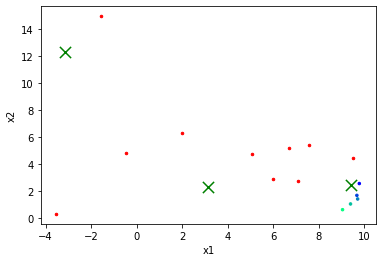

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

sampled_points = pd.read_csv("branin_output_samples.csv", usecols=['x1', 'x2'])

x_points = sampled_points['x1'].values
y_points = sampled_points['x2'].values

doe_x = x_points[:10]
doe_y = y_points[:10]
bo_x = x_points[10:]
bo_y = y_points[10:]
bo_iterations = list(range(len(bo_x)))

point_size = mpl.rcParams['lines.markersize']**1.8

cmap = plt.get_cmap('winter')
plt.scatter(doe_x, doe_y, s=point_size, marker='.', color="red")
plt.scatter(bo_x, bo_y, s=point_size, marker='.', c=bo_iterations, cmap=cmap)

# Optima for the Branin function
op_x = [-3.141, 3.14, 9.425]
op_y = [12.275, 2.275, 2.475]
plt.scatter(op_x, op_y, s=point_size**1.5, marker='x', color='green')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Red dots show points explored during the design of experiments phase. 
Blue points show points explored during optimization, with brighter points denoting points explored in later iterations. 

For this example, we also show the three global optima of the Branin function with green Xs.

In [38]:
%pwd

'/home/samuel/PycharmProjects/hypermapper'